## <font color='red'>Exploratory Data Analysis (EDA)</font>

### Objective
The primary objective of this Exploratory Data Analysis (EDA) is to uncover meaningful insights from the "Musitech" dataset, which tracks user activity, demographics, and engagement. This analysis aims to explore trends in user sign-ups, retention rates, and premium conversions, as well as to identify patterns across different user demographics and instrument preferences. By doing so, it seeks to provide actionable insights for improving user retention and optimizing engagement strategies.

### Current Status
This EDA is a **work in progress**. While it provides initial insights into the dataset, further analysis and refinement are ongoing to deepen understanding and generate more detailed recommendations. The current focus areas include:

1. **User Sign-Up Trends**:
   - Time-series analysis of daily sign-up rates.
   - Identification of peak activity periods and overall trends.

2. **Demographics Breakdown**:
   - Distribution of users by age group and country.
   - Instrument preferences across various age groups.

3. **Retention Analysis**:
   - Examination of Day 1, 7, and 30 retention rates.
   - Correlation analysis between retention and demographic factors.

4. **Churn and Premium Conversion**:
   - Analysis of churn rates across user segments.
   - Patterns in premium subscription conversions.

5. **Behavioral Insights**:
   - Analysis of lesson completion counts.
   - Engagement levels segmented by skill level and instrument.

This iterative process will continue to expand as more complex relationships and trends are explored in subsequent steps.


<img src='wip.jpeg'> 

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats 
import seaborn as sns
import statsmodels.api as sm
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator
from matplotlib import colors as mcolors
from dash import Dash, html, dcc, callback, Output, Input
import plotly.express as px

In [4]:
file = 'pretest.csv'
df = pd.read_csv(file)
n_rows = df.shape[0] 
print('# of rows: ', n_rows,'\n') 
print(f'Date range: {df['start_date'].min()} to {df['start_date'].max()}')
print(f'Columns: ', *[str(i+',') for i in df.columns]) 
print(f'Data types: \n')
print(df.dtypes) 

# of rows:  30848 

Date range: 2024-08-01 to 2024-08-31
Columns:  user_id, start_date, age_group, instrument, country, skill_level, churn, day_1_retention, day_7_retention, day_30_retention, premium_conversion, lessons_completed,
Data types: 

user_id               object
start_date            object
age_group             object
instrument            object
country               object
skill_level           object
churn                  int64
day_1_retention        int64
day_7_retention        int64
day_30_retention       int64
premium_conversion     int64
lessons_completed      int64
dtype: object


In [5]:
df['start_date'] = pd.to_datetime(df['start_date']).dt.normalize() 
if df['start_date'].dtype == 'datetime64[ns]':
    print('Data successfully converted') 

Data successfully converted


In [6]:
df.head() 

,user_id,start_date,age_group,instrument,country,skill_level,churn,day_1_retention,day_7_retention,day_30_retention,premium_conversion,lessons_completed
0,AUG00001,2024-08-01,18-34,Ukulele,Australia,Intermediate,0,0,0,0,0,9
1,AUG00002,2024-08-01,35-54,Piano,United Kingdom,Beginner,0,1,1,1,0,3
2,AUG00003,2024-08-01,35-54,Bass,United States,Beginner,0,0,0,0,0,5
3,AUG00004,2024-08-01,18-34,Guitar,Germany,Beginner,0,0,0,0,0,6
4,AUG00005,2024-08-01,18-34,Piano,Canada,Beginner,0,0,0,0,0,2


## <font color='red'>Sign-Up Count Per Day</font>

### Overview
The analysis of daily sign-up counts provides critical insights into user acquisition trends over time. By plotting the number of sign-ups per day, we can identify peak activity periods and assess the stability of user acquisition efforts. Additionally, the inclusion of a mean reference line highlights deviations from the average sign-up rate, making it easier to spot anomalies or trends.

### Key Insights
1. **Trend Analysis**:
   - The daily sign-up counts exhibit fluctuations, with certain days showing significantly higher activity.
   - These peaks may correspond to marketing campaigns, product launches, or seasonal variations.

2. **Performance Benchmark**:
   - The mean sign-up rate serves as a benchmark for evaluating daily performance.
   - Days with below-average sign-ups may indicate the need for additional promotional efforts.

3. **Actionable Insights**:
   - Identifying factors contributing to peak sign-up days can guide future acquisition strategies.
   - Monitoring sign-up trends over time ensures alignment with growth objectives.

### Visualization
A time-series plot was created to visualize daily sign-up counts. The data was aggregated by `start_date`, and a mean reference line was included to provide context. These visualizations will be refined further as more insights are uncovered.


In [8]:
colors = sns.color_palette()
colors

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

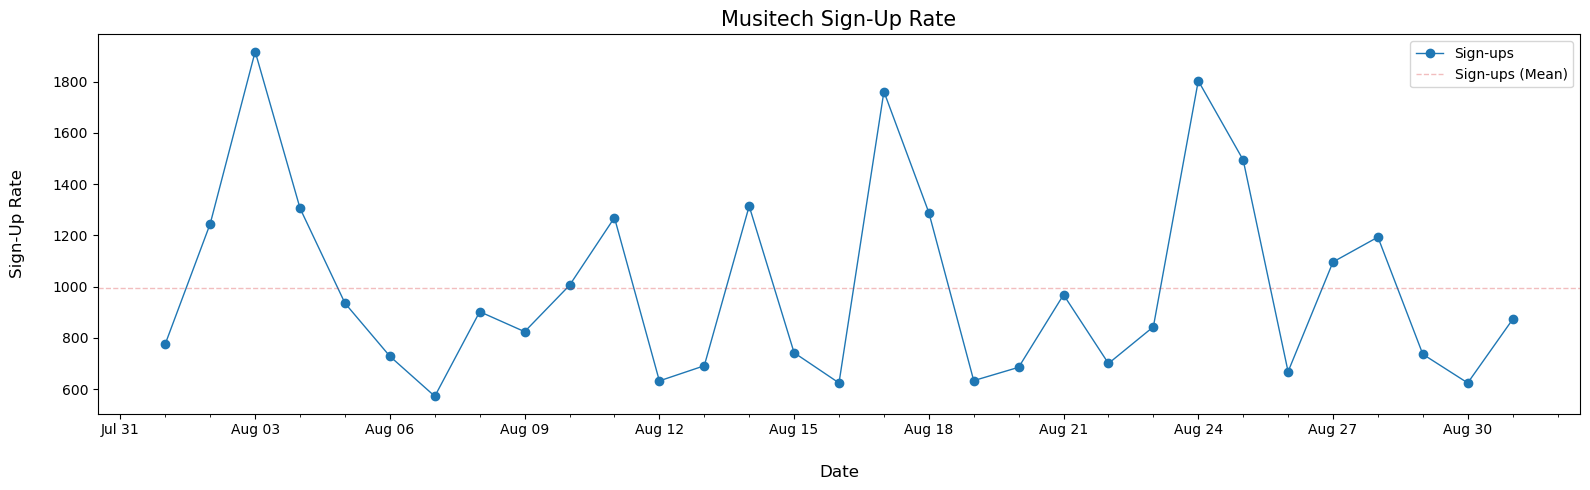

In [9]:
c1, c2 = colors[0], colors[3] 

# Count of sign-ups per day 
sign_up_per_day = df.groupby('start_date')['user_id'].count()
sign_up_mean = sign_up_per_day.mean()

# Plot 
f, ax = plt.subplots(figsize=(16, 5)) 
plt.plot(sign_up_per_day.index, sign_up_per_day, '-o', color=c1, linewidth = 1, label = 'Sign-ups') 
plt.axhline(sign_up_mean, color=c2, linestyle='--', linewidth=1, alpha=0.3, label='Sign-ups (Mean)') 

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))
ax.xaxis.set_minor_locator(mdates.DayLocator())
plt.title('Musitech Sign-Up Rate', fontsize=15)
plt.ylabel('Sign-Up Rate', fontsize=12, labelpad=20)
plt.xlabel('Date', fontsize=12, labelpad=20)
plt.legend()
plt.tight_layout() 
plt.show()

## <font color='red'>Number of Users Per Age Group</font>

### Overview
Getting a clear picture of how users are distributed across age groups helps shape strategies that actually resonate with the right people. By digging into this data, we can figure out who’s driving activity on "Musitech" and where there’s room to grow.

### Key Findings
1. **The Power of Youth**:
   - The **18-34** age group is leading the charge, making up the largest chunk of users. This is clearly the platform's core audience and a key focus for engagement efforts.
   
2. **A Strong Contender**:
   - The **35-54** group also shows solid numbers, proving there’s interest beyond just the younger crowd. There’s real potential to deepen connections here.

3. **Room to Grow**:
   - Users **55+** are a smaller slice of the pie, but that doesn’t mean they’re a lost cause. A bit of tweaking to the platform—simpler onboarding, or content they’d dig—could open up some new opportunities.

### What It Means
Younger users are clearly the lifeblood of the platform, but ignoring the other groups would be a mistake. Focusing on what works for the core audience while making moves to bring in older users could pay off big time.

### Visualization
We threw this into a bar chart to make it crystal clear where the action is. The visual backs up the numbers and gives us a good starting point for thinking about where to focus next.


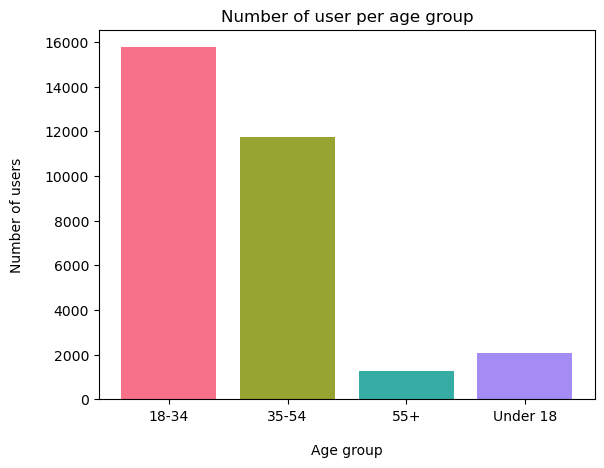

In [11]:
age_group = df.groupby('age_group')['user_id'].count()
plt.bar(age_group.index, age_group, color = [i for i in sns.color_palette("husl", 4)]) 
plt.title('Number of user per age group')
plt.xlabel('Age group', labelpad=15)
plt.ylabel('Number of users', labelpad=15)
plt.show() 

In [12]:
age_group_instruments = df.groupby('instrument')['age_group'].value_counts()
age_group_labels = list(age_group_instruments.index.get_level_values(0).unique())
print(f"Age group labels: {age_group_labels}") 
instruments_labels = list(age_group_instruments.index.get_level_values(1).unique())
print(f"Instrument labels: {instruments_labels}")

Age group labels: ['Bass', 'Guitar', 'Piano', 'Ukulele', 'Voice']
Instrument labels: ['18-34', '35-54', 'Under 18', '55+']


## <font color='red'>Number of Instrument Users by Age Group</font>

### Overview
Breaking down instrument preferences by age group gives us a solid view of who’s playing what and how it varies across demographics. This is where we start to see the personality of "Musitech" come alive—different instruments appealing to different age groups.

### Key Findings
1. **Youthful Vibes**:
   - The **18-34** crowd dominates instruments like guitar and ukulele, which makes sense—they’re trendy, accessible, and perfect for beginners or casual players.

2. **Refined Tastes**:
   - The **35-54** group leans heavily into piano and bass. This suggests they’re looking for instruments that carry a mix of sophistication and versatility, often tied to deeper musical aspirations.

3. **Specialized Interests**:
   - For users **55 and older**, the numbers are smaller but not insignificant. Their instrument preferences lean toward classics like piano, possibly reflecting long-held hobbies or a desire for something familiar.

### What It Means
Each age group brings its own flavor to the platform. Tailoring content—like tutorials or lessons—to match these preferences could boost engagement. For example:
   - Younger users might love quick-start guides for trendy instruments.
   - Older groups might appreciate advanced techniques or genres like jazz and classical.

### Visualization
A breakdown by instrument and age group paints a clear picture of these dynamics. This isn’t just about numbers—it’s about understanding how music fits into different lives. We’ll keep building on this to fine-tune the platform experience.


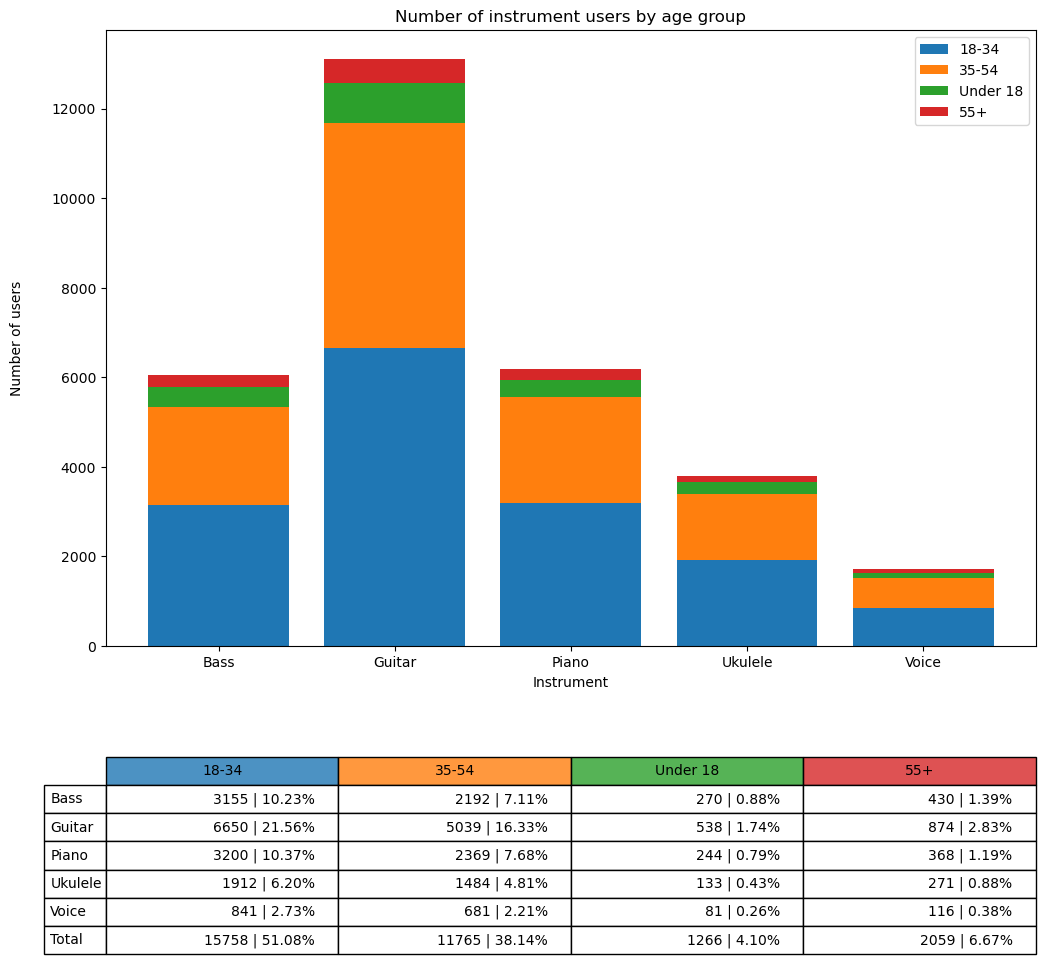

In [14]:
y_offset = np.zeros(len(age_group_labels))  # Initialize cumulative offset 
plt.figure(figsize=(12,8)) 
# Iteration over each instrument
for stack, instrument in enumerate(instruments_labels):
    bar = plt.bar(
        age_group_labels, 
        age_group_instruments.loc[:, instrument],  # Values for each instrument
        bottom=y_offset,  # Stack on top of previous bars
        label=instrument,
        color = colors[stack] 
    )
    y_offset += age_group_instruments.loc[:, instrument]  # Update offset

agg_values = age_group_instruments.unstack().values.tolist()
sums = [sum(values) for values in zip(*agg_values)]
agg_values.append(sums)
age_group_labels.append('Total')

cell_text = [[f"{i} | {round((i / df.shape[0]) * 100, 2):.2f}%"  for i in x] for x in agg_values] 


plt.table(
    cellText=cell_text, 
    rowLabels= age_group_labels, 
    colLabels=instruments_labels,
    colColours= [mcolors.to_rgba(color, 0.8) for color in colors],
    cellLoc = 'right',
    bbox=[0, -0.5, 1, 0.32]
)

plt.title("Number of instrument users by age group")
plt.ylabel('Number of users', labelpad=20)
plt.xlabel('Instrument') 
plt.legend()
plt.show()

## <font color='red'>Function:</font> `grouping_retention_conversion`

This function is created for convenience, as relating retention and conversion rates to other features will be a recurring task throughout the analysis. By encapsulating the logic into a reusable function, we ensure consistency and reduce redundancy in the code. 

The function:
1. **Groups the data** by the specified features (`feat1` and `feat2`).
2. **Calculates retention rates** (`Day 1`, `Day 7`, `Day 30`) as percentages for each group.
3. **Calculates conversion metrics**, including the number of conversions, total percentage, and relative percentage.
4. Handles potential errors gracefully to avoid disrupting the workflow.

This modular approach allows for clean and efficient exploration of retention and conversion rates across different subsets of the dataset.


In [15]:
def grouping_retention_conversion(df, feat1, feat2):
    """
    Calculate retention and conversion metrics grouped by given features.

    Parameters:
        df (pd.DataFrame): Input DataFrame.
        feat1 (str): First feature for grouping.
        feat2 (str): Second feature for grouping.

    Returns:
        pd.DataFrame: Retention data with percentages.
        pd.DataFrame: Conversion data with total and relative percentages.
    """
    total_conversions = df['premium_conversion'].sum()
    n_rows = df.shape[0]
    try:
        feats_retention = round(
            df.groupby([feat1,feat2])[['day_1_retention', 'day_7_retention',
           'day_30_retention']].sum()/n_rows*100,2).reset_index().melt(
            id_vars=[feat1,feat2], 
            var_name="day", 
            value_name="retention"
        )
        day_dict = {'day_1_retention':'Day 1', 'day_7_retention': 'Day 7', 'day_30_retention':'Day 30'}
        feats_retention['day'] = feats_retention['day'].map(day_dict)
    except Exception as e:
        print(f"Error: {e}")
        print(f"Error type: {type(e).__name__}")
        return None, None
    try:
        feats_conversion = df.groupby(
            [feat1,feat2])[['premium_conversion']].sum().reset_index().melt(
            id_vars = [feat1,feat2],
            value_name = 'number_of_conversions'
        )
        feats_conversion['total_percentage'] = round(feats_conversion['number_of_conversions']/n_rows*100,2)
        feats_conversion['relative_percentage'] = (
        round(feats_conversion['number_of_conversions'] / total_conversions * 100, 2)
        if total_conversions != 0 else 0
        )
    except Exception as e:
        print(f"Error in conversion calculation: {e}")
        print(f"Error type: {type(e).__name__}")
        return feats_retention, None
        
    print('Data grouping successfully completed') 
    return feats_retention, feats_conversion

In [16]:
retention_per_age_group_instrument, conversion_per_age_group_instrument = grouping_retention_conversion(df, 'age_group', 'instrument')

Data grouping successfully completed


In [17]:
retention_per_age_group_instrument.head()

,age_group,instrument,day,retention
0,18-34,Bass,Day 1,0.84
1,18-34,Guitar,Day 1,2.22
2,18-34,Piano,Day 1,1.11
3,18-34,Ukulele,Day 1,0.62
4,18-34,Voice,Day 1,0.21


In [18]:
conversion_per_age_group_instrument.head()

,age_group,instrument,variable,number_of_conversions,total_percentage,relative_percentage
0,18-34,Bass,premium_conversion,25,0.08,6.28
1,18-34,Guitar,premium_conversion,63,0.20,15.83
2,18-34,Piano,premium_conversion,30,0.10,7.54
3,18-34,Ukulele,premium_conversion,17,0.06,4.27
4,18-34,Voice,premium_conversion,7,0.02,1.76


## <font color='red'>Retention Rates per Instrument and Age Group</font>

### Overview
This analysis explores retention rates across different instruments and age groups, focusing on Day 1, Day 7, and Day 30 retention. By breaking down these rates, we gain a better understanding of user engagement and which segments maintain long-term activity on the platform.

### Key Findings
1. **Initial Engagement (Day 1)**:
   - Users aged **18-34** generally show the highest retention rates across instruments, especially for popular options like guitar and piano.
   - Instruments like ukulele and voice have lower initial retention, possibly reflecting their niche appeal or casual nature.

2. **Short-Term Retention (Day 7)**:
   - Retention drops slightly across the board but remains relatively strong for instruments like guitar and piano, particularly among **18-34** and **35-54** age groups.
   - The **55+** group struggles to maintain engagement, with lower retention across all instruments by this point.

3. **Long-Term Retention (Day 30)**:
   - Long-term retention is more challenging, with significant declines observed, particularly for younger users with instruments like ukulele and voice.
   - Guitar and piano maintain better rates among **18-34** and **35-54**, reflecting their broader and lasting appeal.

### Implications
- **Content Personalization**:
  - Focused efforts on instruments with strong retention (guitar, piano) can maximize engagement. 
  - For instruments with lower retention (ukulele, voice), consider simplifying lessons or incorporating quick wins to hook users early on.
  - The platform currently lacks a relatable figure for students to connect with. To address this, we’re planning a test to evaluate whether introducing a teacher for each instrument during onboarding and lesson introductions will positively impact retention rates.
    
- **Age-Specific Strategies**:
  - Younger users (18-34) show the most potential for retention but need content that keeps them engaged beyond the initial stages.
  - For older users, retention strategies may involve simplified interfaces or targeted communication to re-engage lapsed users.

### Visualization
This data has been reshaped to allow for clear visualization of retention rates by instrument and age group over time. The trends highlight key opportunities for improving platform stickiness and long-term engagement.


In [21]:
app = Dash()

# App layout
app.layout = [
    html.H1('Retention Rates per instrument and age groups',
           style = {
               'textAlign':'center',
               'color':'#C1292E',
               'font-family':'sans-serif',
               'text-transform':'uppercase'
           }),
    html.Div(children= 'retentions rate per day, across different age groups. results are in percentages',
            style = {
               'textAlign':'center',
               'color':'#235789',
               'font-family':'sans-serif',
                'text-transform':'uppercase'
           }),
    html.Hr(),
    dcc.Dropdown(
    id="dropdown",
    options=[
        {"label": "Day 1 Retention", "value": "Day 1"},
        {"label": "Day 7 Retention", "value": "Day 7"},
        {"label": "Day 30 Retention", "value": "Day 30"}
    ],
    value="Day 1",
    style= {'text-transform': 'uppercase',
           'font-family':'sans-serif'}
),
    dcc.Graph(id='graph') 
]

@app.callback(
    Output("graph", "figure"), 
    Input("dropdown", "value"))
def update_bar_chart(day):
    # Filter for the selected day
    filtered_df = retention_per_age_group_instrument[retention_per_age_group_instrument["day"] == day]
    
    # Create the bar chart
    fig = px.bar(filtered_df, x="instrument", y="retention", color='age_group', barmode="group", text= "retention", title=f"Retention for {day}")
    fig.update_layout(
        xaxis_title="Age Group",  
        yaxis_title="Retention (%)",
        legend_title=dict(text="Age group")
    )
    return fig



app.run_server(debug=True)

# TO BE CONTINUED...